In [106]:
# same as hw3

def read_sample():
    with open('cpusmall_scale.txt') as f:
        lines = f.readlines()

    samples = list()
    for line in lines:
        elements = line.split()

        label = float(elements[0])

        features = list(float(item.split(':')[1]) for item in elements[1:])
        features.insert(0, 1)

        sample = {
            'label': label,
            'features': features
        }
        samples.append(sample)

    return samples

In [78]:
import numpy as np

def linear_regression(train_data, test_data):
    # calculate w_lin
    y = np.matrix(list(sample['label'] for sample in train_data)).T
    x = np.matrix(list(sample['features'] for sample in train_data))

    x_pinv = np.linalg.pinv(x)
    w_lin = x_pinv * y

    # calculate ein (sqr)
    y_pred = x * w_lin
    ein = np.sum(np.square(y - y_pred))/(len(train_data))

    # calculate eout (sqr)
    y_test = np.matrix(list(sample['label'] for sample in test_data)).T
    x_test = np.matrix(list(sample['features'] for sample in test_data))

    y_pred = x_test * w_lin
    eout = np.sum(np.square(y_test - y_pred))/(len(test_data))

    return ein, eout


def sgd(train_data, test_data, iteration, record_interval):
    ein_list = dict()
    eout_list = dict()

    rng = np.random.default_rng()

    # set parameters
    weight = np.matrix(np.zeros(len(train_data[0]['features'])))
    learning_rate = 0.01

    for i in range(1, iteration+1, 1):
        # generate x & y
        select_index = int(rng.uniform(0, len(train_data)))
        x = np.matrix(train_data[select_index]['features'])
        y = train_data[select_index]['label']

        # update weight
        weight += learning_rate * 2 * (y - weight * x.T) * x

        if i % record_interval == 0:
            # calculate ein (sqr)
            y_train = np.matrix(list(sample['label'] for sample in train_data)).T
            x_train = np.matrix(list(sample['features'] for sample in train_data))
            y_pred = x_train * weight.T
            ein = np.sum(np.square(y_train - y_pred))/(len(train_data))

            # calculate eout (sqr)
            y_test = np.matrix(list(sample['label'] for sample in test_data)).T
            x_test = np.matrix(list(sample['features'] for sample in test_data))
            y_pred = x_test * weight.T
            eout = np.sum(np.square(y_test - y_pred))/(len(test_data))

            ein_list[i] = ein.item()
            eout_list[i] = eout.item()

    return ein_list, eout_list

{'label': 90.0, 'features': [1, -0.993496, -0.993043, -0.850291, -0.963479, -0.960727, -0.900596, -0.96642, -0.863996, -0.606175, -0.999291, 0.0811894, 0.651101]}
8192
round=0
round=1
round=2
round=3
round=4
round=5
round=6
round=7
round=8
round=9
round=10
round=11
round=12
round=13
round=14
round=15
round=16
round=17
round=18
round=19
round=20
round=21
round=22
round=23
round=24
round=25
round=26
round=27
round=28
round=29
round=30
round=31
round=32
round=33
round=34
round=35
round=36
round=37
round=38
round=39
round=40
round=41
round=42
round=43
round=44
round=45
round=46
round=47
round=48
round=49
round=50
round=51
round=52
round=53
round=54
round=55
round=56
round=57
round=58
round=59
round=60
round=61
round=62
round=63
round=64
round=65
round=66
round=67
round=68
round=69
round=70
round=71
round=72
round=73
round=74
round=75
round=76
round=77
round=78
round=79
round=80
round=81
round=82
round=83
round=84
round=85
round=86
round=87
round=88
round=89
round=90
round=91
round=92
round

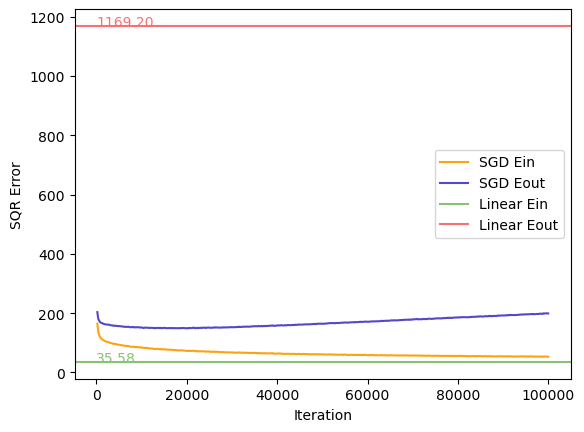

In [ ]:
# problem 10
samples = read_sample()

N = 64
repeat = 1126
sgd_iteration = 100000
record_interval = 200

time_values = list(range(0, sgd_iteration+1, record_interval))
time_values.pop(0)

lin_ein_list = list()
lin_eout_list = list()
sgd_ein_list = dict()
sgd_eout_list = dict()
for t in time_values:
    sgd_ein_list[t] = list()
    sgd_eout_list[t] = list()

for r in range(repeat):
    print(f'round={r}')

    # generate train & test data
    rng = np.random.default_rng()
    indices = list(range(len(samples)))
    select_indices = rng.choice(indices, N, replace=False)
    train_data = list(samples[i] for i in select_indices)
    test_data = list(samples[i] for i in indices if i not in select_indices)

    # run linear regression
    lin_ein, lin_eout = linear_regression(train_data, test_data)
    lin_ein_list.append(lin_ein)
    lin_eout_list.append(lin_eout)

    # run sgd
    sgd_ein, sgd_eout = sgd(train_data, test_data, sgd_iteration, record_interval)
    for t in time_values:
        sgd_ein_list[t].append(sgd_ein[t])
        sgd_eout_list[t].append(sgd_eout[t])

# calculate average
lin_ein_avg = np.mean(lin_ein_list)
lin_eout_avg = np.mean(lin_eout_list)
for i in time_values:
    sgd_ein_list[i] = np.mean(sgd_ein_list[i])
    sgd_eout_list[i] = np.mean(sgd_eout_list[i])

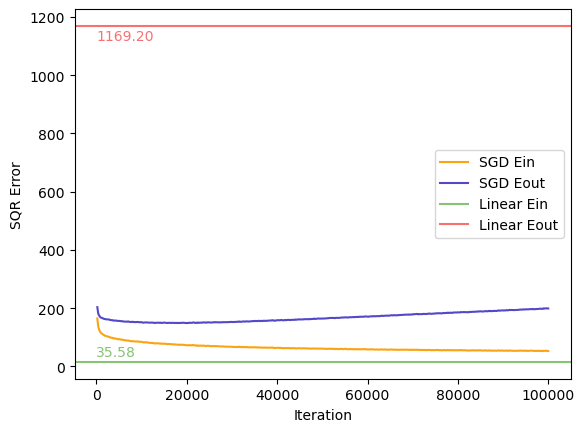

In [87]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(time_values, sgd_ein_list.values(), label='SGD Ein', color='#fCA311')
plt.plot(time_values, sgd_eout_list.values(), label='SGD Eout', color='#5448C8')
plt.axhline(y=lin_ein_avg-20, label='Linear Ein', color='#88C273')
plt.text(0, lin_ein_avg, f'{lin_ein_avg:.2f}', color='#88C273')
plt.axhline(y=lin_eout_avg, label='Linear Eout', color='#F87171')
plt.text(0, lin_eout_avg-50, f'{lin_eout_avg:.2f}', color='#F87171')
plt.xlabel('Iteration')
plt.ylabel('SQR Error')
plt.legend()
plt.savefig('p10-plot.png')

In [103]:
def polynomial_transform(features, Q):
    bias = features.pop(0)
    transformed_features = [bias]

    for q in range(1, Q+1):
        transformed_features += list(np.power(features, q))

    return transformed_features

In [114]:
# problem 11
samples = read_sample()

poly_samples = read_sample()
for sample in poly_samples:
    sample['features'] = polynomial_transform(sample['features'], 3)

N = 64
repeat = 1126

ein_list = list()
eout_list = list()

for r in range(repeat):
    print(f'round={r}')

    # generate train & test data
    rng = np.random.default_rng()
    indices = list(range(len(samples)))
    select_indices = rng.choice(indices, N, replace=False)

    train_data = list(samples[i] for i in select_indices)
    test_data = list(samples[i] for i in indices if i not in select_indices)

    poly_train_data = list(poly_samples[i] for i in select_indices)
    poly_test_data = list(poly_samples[i] for i in indices if i not in select_indices)

    # run linear regression
    lin_ein, lin_eout = linear_regression(train_data, test_data)
    poly_ein, poly_eout = linear_regression(poly_train_data, poly_test_data)

    ein_list.append(lin_ein - poly_ein)
    eout_list.append(lin_eout - poly_eout)

round=0
round=1
round=2
round=3
round=4
round=5
round=6
round=7
round=8
round=9
round=10
round=11
round=12
round=13
round=14
round=15
round=16
round=17
round=18
round=19
round=20
round=21
round=22
round=23
round=24
round=25
round=26
round=27
round=28
round=29
round=30
round=31
round=32
round=33
round=34
round=35
round=36
round=37
round=38
round=39
round=40
round=41
round=42
round=43
round=44
round=45
round=46
round=47
round=48
round=49
round=50
round=51
round=52
round=53
round=54
round=55
round=56
round=57
round=58
round=59
round=60
round=61
round=62
round=63
round=64
round=65
round=66
round=67
round=68
round=69
round=70
round=71
round=72
round=73
round=74
round=75
round=76
round=77
round=78
round=79
round=80
round=81
round=82
round=83
round=84
round=85
round=86
round=87
round=88
round=89
round=90
round=91
round=92
round=93
round=94
round=95
round=96
round=97
round=98
round=99
round=100
round=101
round=102
round=103
round=104
round=105
round=106
round=107
round=108
round=109
round=110


average ein difference: 33.48223579870386
average eout difference: -2850004899014561.5


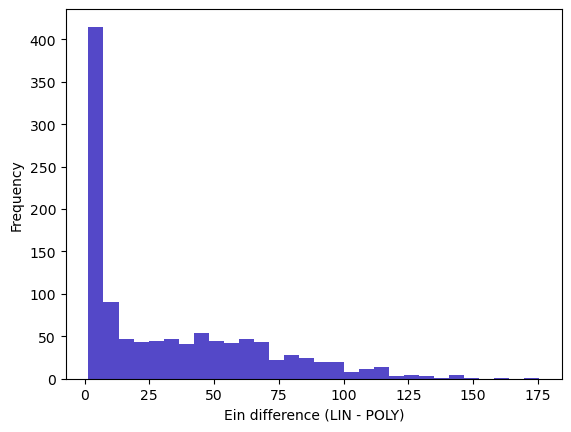

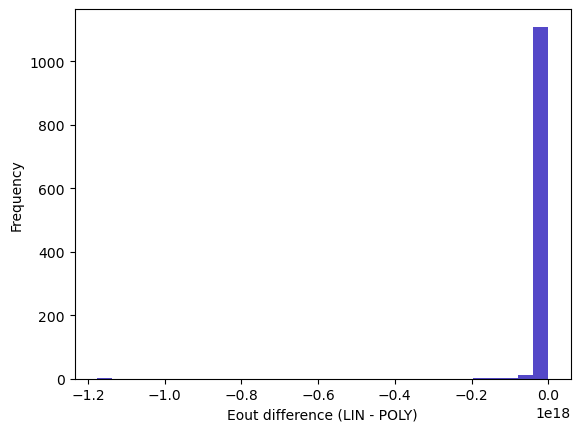

In [117]:
import matplotlib.pyplot as plt

print(f"average ein difference: {np.mean(ein_list)}")
plt.figure()
plt.hist(ein_list, bins=30, color='#5448C8')
plt.xlabel('Ein difference (LIN - POLY)')
plt.ylabel('Frequency')
plt.savefig('p11-plot.png')

print(f"average eout difference: {np.mean(eout_list)}")
plt.figure()
plt.hist(eout_list, bins=30, color='#5448C8')
plt.xlabel('Eout difference (LIN - POLY)')
plt.ylabel('Frequency')
plt.savefig('p12-plot.png')